The main tool for plotting in R is `ggplot`, which we have talked about
a little and which will be covered in detail in other courses.

The purpose of this lesson is to talk about tools for plotting in
Python. Here the situation is more diverse, and there are a number of
different plotting packages with different capabilities. The most
notable ones are:

-   `matplotlib` the most fundamental package. Very capable but
    old-fashioned and the output isn't of the highest graphical quality.
-   `bokeh` which offers high quality visuals and interactivity.  
-   `altair` which is a package that has similar syntax to `ggplot` and
    follows the Wilkinson "Grammar of Graphics" philosophy
-   `plotly` which offers even more opportunities for interactivity
-   `seaborn` which has very high quality visuals and is very common in
    publications especially in genomics.

We'll discuss `matplotlib`, `bokeh`, and `seaborn` and you can explore
the others on your own to see what you like best.

We'll work with the `penguins` dataset.

In [2]:
import matplotlib.pyplot as plt  # this gives a "matlab"-like interface to matplotlib
import pandas as pd
import numpy as np

penguins = pd.read_csv("data/penguins-raw.csv")
penguins = penguins.drop("Comments", axis=1)
penguins.dropna()

x = np.linspace(-5, 5)
y = x**2

The `matplotlib` package is organized around `figures` and `axes`.
Essentially, a set of `axes` is a single graph, and a `figure` is a
collection of axes organized into a single picture. To work with
`matplotlib` one first creates a figure and then adds axes to it.

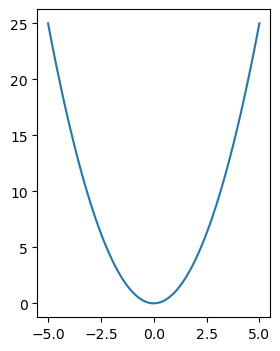

In [3]:
fig = plt.figure(figsize=(3, 4))
axes = fig.add_subplot(
    1, 1, 1
)  # here we are saying the figure will have 1 row, 1 column, and this is plot number 1.
axes.plot(x, y)  # plot y vs x

You can plot multiple things on on set of axes. We also add a grid.

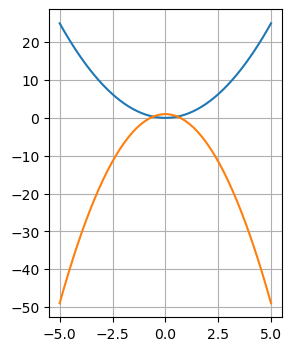

In [4]:
axes.plot(x, 1 - 2 * y)
axes.grid(True)
fig

If we want a 2x2 array of plots, we could proceed like this.

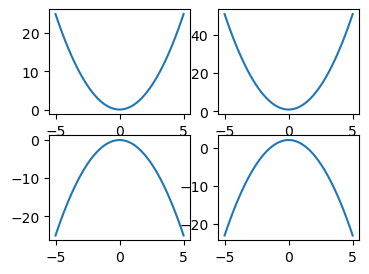

In [5]:
fig = plt.figure(figsize=(4, 3))
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)
axes1.plot(x, y)
axes2.plot(x, 2 * y + 1)
axes3.plot(x, -y)
axes4.plot(x, -y + 2)

There are lots of types of plots, as always.

In [8]:
len(dir(axes))

450

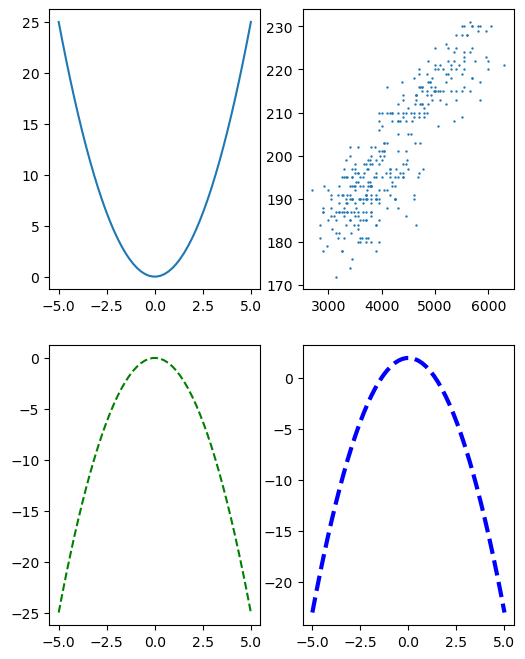

In [7]:
fig = plt.figure(figsize=(6, 8))
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)
axes1.plot(x, y)
axes2.scatter(penguins["Body Mass (g)"], penguins["Flipper Length (mm)"], s=0.5)
axes3.plot(x, -y, color="green", linestyle="dashed")
axes4.plot(x, -y + 2, color="blue", linestyle="--", linewidth=3)

You need titles (for the figure and the individual plots) and axis
labels.

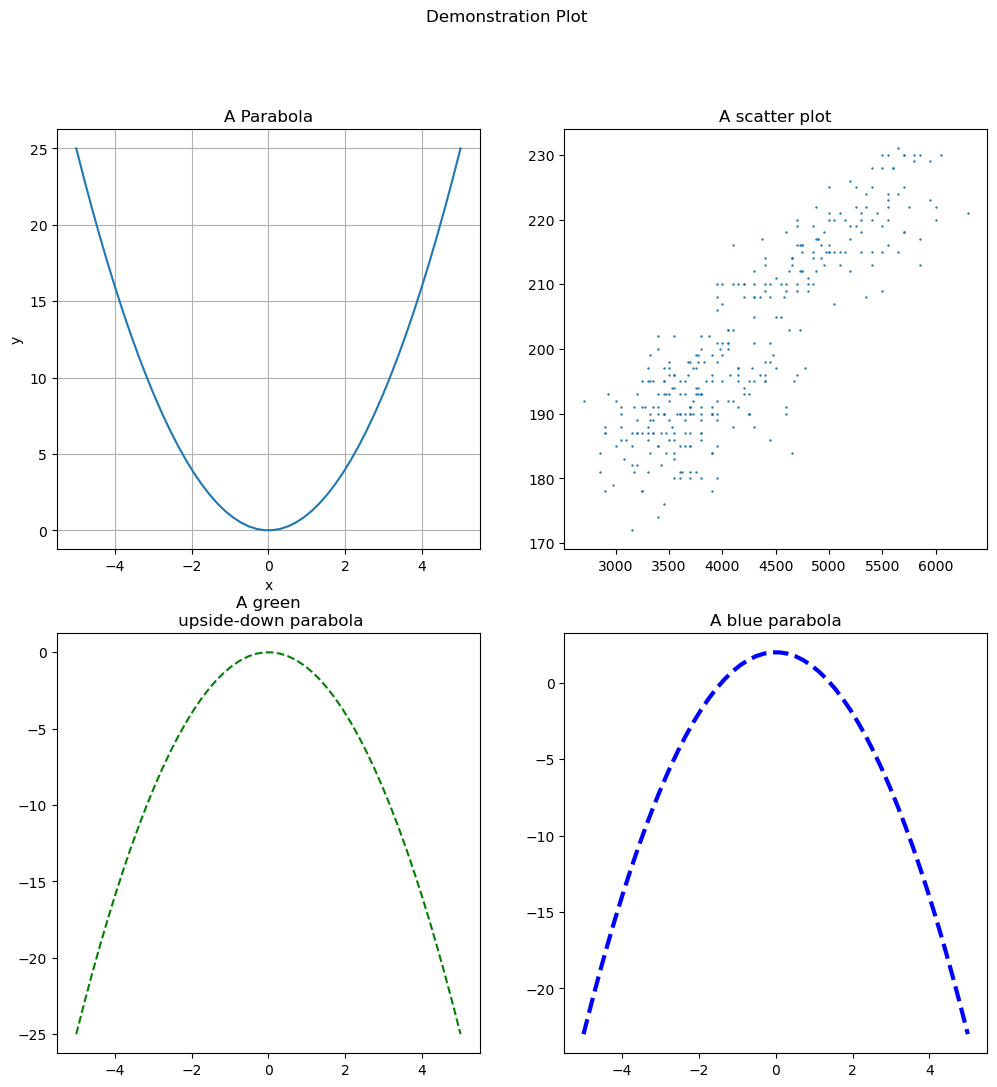

In [9]:
fig.set_size_inches(12, 12)
fig.suptitle("Demonstration Plot")
axes1.set_title("A Parabola")
axes1.set_xlabel("x")
axes1.set_ylabel("y")
axes1.grid(True)
axes2.set_title("A scatter plot")
axes3.set_title("A green\n upside-down parabola")
axes4.set_title("A blue parabola")
fig

Let's look at a fully developed scatter plot.

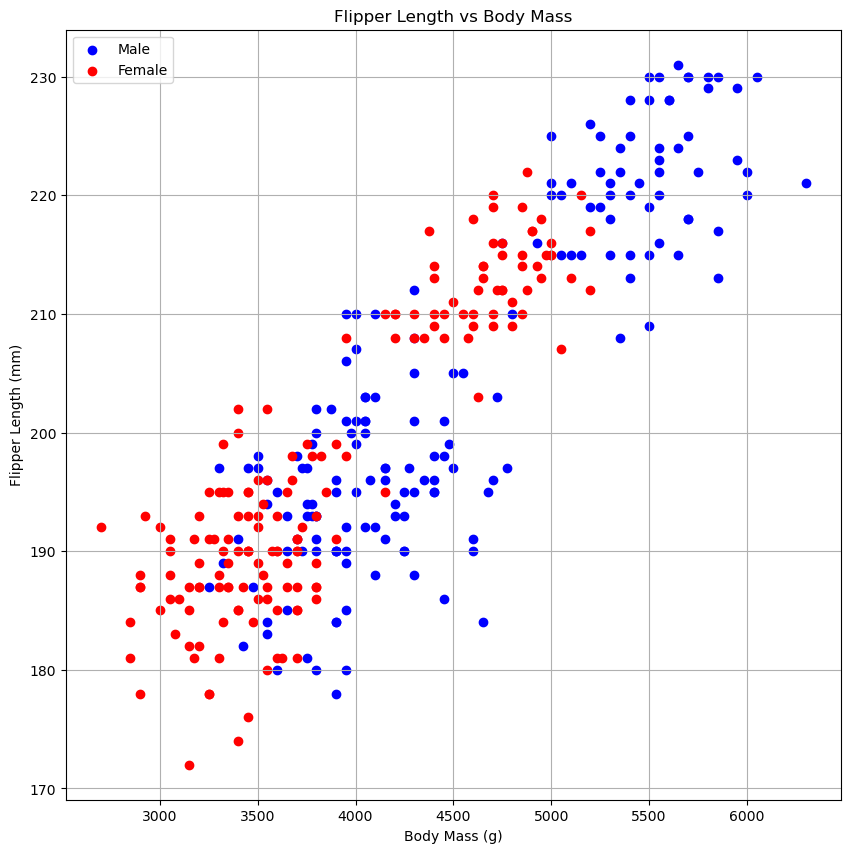

In [10]:
fig = plt.figure(figsize=(10, 10))
# fig.suptitle("Flipper Length vs Body Mass")
axes = fig.add_subplot(1, 1, 1)
axes.grid(True)
axes.set_xlabel("Body Mass (g)")
axes.set_ylabel("Flipper Length (mm)")
axes.set_title("Flipper Length vs Body Mass")
# axes.set_xlim(0,5500)
# axes.set_ylim(0,300)

Males = penguins[penguins["Sex"] == "MALE"]
Females = penguins[penguins["Sex"] == "FEMALE"]
male_plot = axes.scatter(
    x=Males["Body Mass (g)"], y=Males["Flipper Length (mm)"], c="blue", label="Male"
)
female_plot = axes.scatter(
    x=Females["Body Mass (g)"],
    y=Females["Flipper Length (mm)"],
    c="red",
    label="Female",
)
axes.legend(["Male", "Female"])

Finally we can generate a multiple plot.

In [ ]:
fig = plt.figure(figsize=(10, 30))
Males = penguins[penguins["Sex"] == "MALE"]
Females = penguins[penguins["Sex"] == "FEMALE"]
for i, x in enumerate(
    ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"]
):
    axes = fig.add_subplot(3, 1, i + 1)
    axes.grid(True)
    axes.set_title(f"{x} vs Body Mass")
    male_plot = axes.scatter(
        x=Males["Body Mass (g)"], y=Males[x], c="blue", label="Male"
    )
    female_plot = axes.scatter(
        x=Females["Body Mass (g)"], y=Females[x], c="red", label="Female"
    )
    axes.legend(["Male", "Female"])

Matplotlib also offers a histogram command.

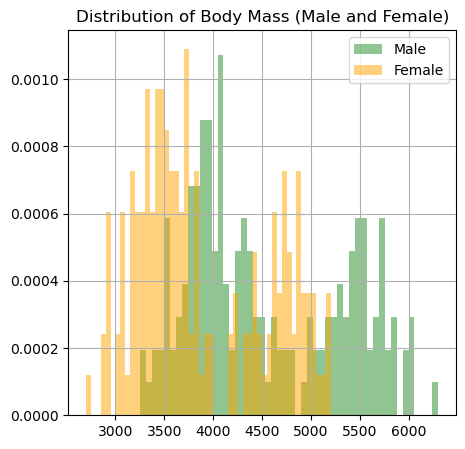

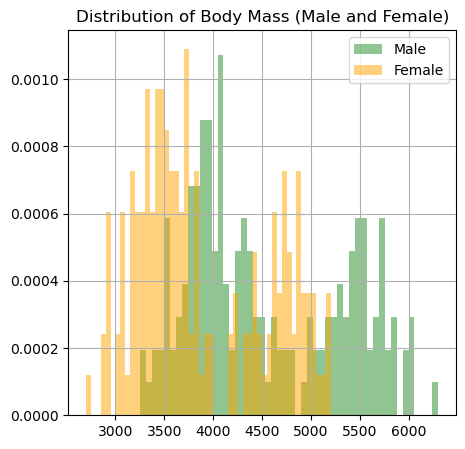

In [11]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_subplot(1, 1, 1)
axes.grid(True)
axes.set_title("Distribution of Body Mass (Male and Female)")
axes.hist(
    Males["Body Mass (g)"],
    color="forestgreen",
    bins=50,
    density=True,
    label="Male",
    alpha=0.5,
)
axes.hist(
    Females["Body Mass (g)"],
    color="orange",
    bins=50,
    density=True,
    label="Female",
    alpha=0.5,
)
axes.legend(["Male", "Female"])
fig

There are millions of others.....

## Seaborn

Seaborn is based on matplotlib but the graphics are of higher quality
(IMHO) and many of the plots published in scientific journals in biology
are recognizably seaborn.

Seaborn is also better at handling data sources than matplotlib and has
built in statistical capabilities (box plots, density curves, fitted
lines...)

Ultimately to make seaborn really work you need to know matplotlib well.

See [the seaborn documentation](https://seaborn.pydata.org/index.html)

In [13]:
import seaborn as sns

sns.set_theme()

We can declare a data source for our plots.

A scatter plot is called a `relplot` for "relationship plot".

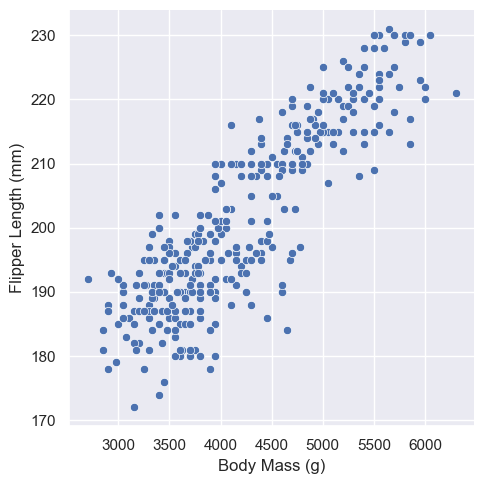

In [14]:
sns.relplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)")

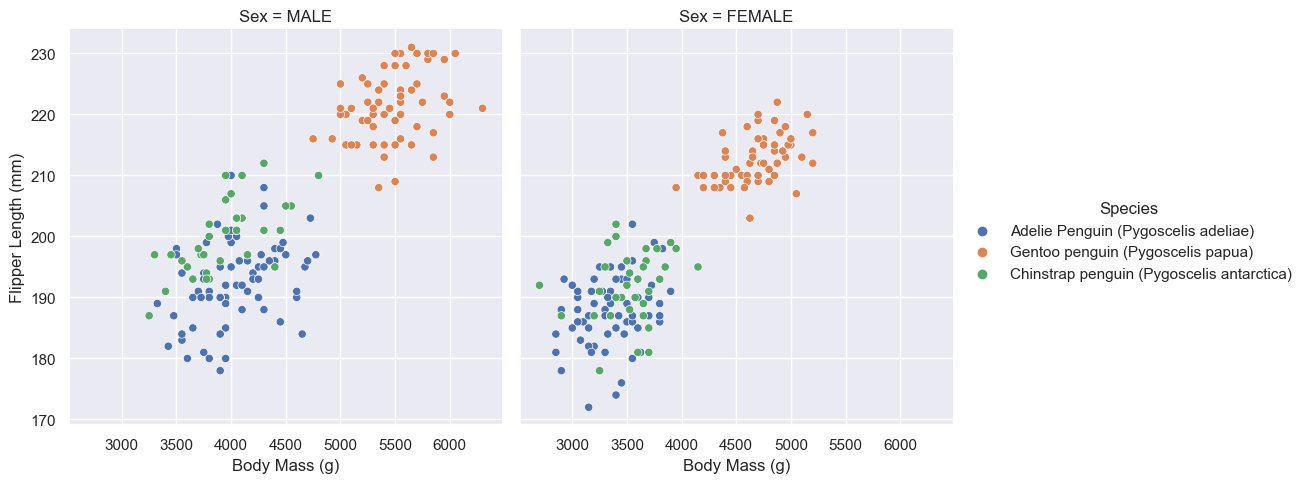

In [15]:
sns.relplot(
    data=penguins, col="Sex", hue="Species", x="Body Mass (g)", y="Flipper Length (mm)"
)

In [ ]:
ax = sns.relplot(
    data=penguins, hue="Species", x="Body Mass (g)", y="Flipper Length (mm)"
)

Seaborn has some built-in statistical stuff, like `ggplot` does.

In [ ]:
sns.lmplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species")

Histograms are `displots`.

In [ ]:
# displot is a facetgrid object with multiple axes within it; you need to
# get at those to mess with titles, etc.
ax = sns.displot(data=penguins, x="Body Mass (g)", hue="Species")
ax.axes[0, 0].set_title("Distribution of Body Mass")

Here are some examples of what you can do with seaborn. Let's clean up
the species names and the sex field first.

In [ ]:
penguins["SpeciesS"] = penguins["Species"].apply(lambda x: x.split(" ")[0])
penguins["Sex"] = penguins["Sex"].apply(
    lambda x: x if type(x) != str else x[0] + x[1:].lower()
)

You can split the histograms by species.

In [ ]:
ax = sns.displot(data=penguins, x="Body Mass (g)", col="SpeciesS")
ax.set_titles("{col_name}")

You can split the histograms by species and sex, and add density curves
if you want.

In [ ]:
ax = sns.displot(data=penguins, x="Body Mass (g)", col="SpeciesS", row="Sex", kde=True)
ax.set_titles("{col_name}|{row_name}")

You can add colors if you want.

In [ ]:
ax = sns.displot(data=penguins, x="Body Mass (g)", row="Sex", kde=True, hue="SpeciesS")
ax.set_titles("{row_name}")

Among the other types of plots you can get are:

Bar Plots

In [ ]:
ax = sns.catplot(data=penguins, x="SpeciesS", kind="count", hue="Sex")

Box Plots

In [ ]:
ax = sns.boxplot(data=penguins, x="Body Mass (g)", y="SpeciesS")
label = ax.set_ylabel("Species")

Violin Plots

In [ ]:
ax = sns.violinplot(data=penguins, x="Body Mass (g)", y="SpeciesS")
label = ax.set_ylabel("Species")

There are many other things you can do. See the [seaborn plot
gallery](https://seaborn.pydata.org/examples/index.html).

## Bokeh

Bokeh is an open source plotting package that is not derived from
matplotlib. It has an underlying javascript engine that provides
interactivity.

In [16]:
import bokeh
from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.models import ColumnDataSource

output_notebook()

Loading BokehJS ...

We setup a ColumnDataSource from our penguins dataframe.

In [17]:
penguins_source = ColumnDataSource(penguins)

We plot by creating a `figure` and adding things to it.

In [18]:
F = figure()
F.scatter(x="Body Mass (g)", y="Culmen Length (mm)", source=penguins_source)
show(F)

One of the nice featues of Bokeh is that we can add interactive tools to
it.

In [19]:
x = "Body Mass (g)"
y = "Culmen Length (mm)"
tooltips = [
    ("Mass", "@{Body Mass (g)}"),
    ("Length", "@{Culmen Length (mm)}"),
    ("Sex", "@Sex"),
]
F = figure(x_axis_label=x, y_axis_label=y, title=f"{y} vs {x}", tooltips=tooltips)
F.scatter(x=x, y=y, source=penguins_source)
show(F)

To color something, we create a color mapper function.

In [20]:
from bokeh.transform import factor_cmap

color_mapper = factor_cmap(
    "SpeciesS",
    palette=["red", "green", "blue"],
    factors=["Adelie", "Gentoo", "Chinstrap"],
)
F = figure(x_axis_label=x, y_axis_label=y, title=f"{y} vs {x}", tooltips=tooltips)
F.scatter(
    x=x,
    y=y,
    size=7,
    fill_color=factor_cmap(
        "SpeciesS",
        palette=["red", "green", "blue"],
        factors=["Adelie", "Gentoo", "Chinstrap"],
    ),
    source=penguins_source,
)
show(F)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='SpeciesS' [closest match: 'Species'] {renderer: GlyphRenderer(id='p1146', ...)}
